### Chapter 2
In this notebook we follow along from sections 2.1 through 2.3. The text files were acquired using a modified version of professor Slater's `CB.ipynb` notebook, the modification simply output the individual matrices for men and woman for years 1999 through 2012 into text files in sub folders `MenTxt` and `WomenTxt`.

This notebook creates two files: `cbMen.rda` and `cbWomen.rda` which allow us to forgo ever coming back to this notebook and instead pick up in the next notebook that deals with sections 2.4 and beyond

In [1]:
els = readLines("MenTxt/2012.txt")
els[1:10]

[1] "\"\""                                                                                              
 [2] "\"                 Credit Union Cherry Blossom Ten Mile Run\""                                     
 [3] "\"                 Washington, DC     Sunday, April 1, 2012\""                                     
 [4] "\"\""                                                                                              
 [5] "\"                Official Male Results (Sorted By Net Time)\""                                    
 [6] "\"\""                                                                                              
 [7] "\"Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Time    Pace  \""
 [8] "\"===== =========== ====== ====================== == ==================== ======= ======= ===== \""
 [9] "\"    1     1/347        9 Allan Kiprono          22 Kenya                  22:32   45:15  4:32 \""
[10] "\"    2     2/347       11 Lani Kiplagat          23 Kenya                  22:38   46:28  4:39 \""

In [2]:
els2011 = readLines("MenTxt/2011.txt")
els2011[1:10]

[1] "\"\""                                                                                                      
 [2] "\"                 Credit Union Cherry Blossom Ten Mile Run\""                                             
 [3] "\"                 Washington, DC     Sunday, April 3, 2011\""                                             
 [4] "\"\""                                                                                                      
 [5] "\"                           Official Male Results\""                                                      
 [6] "\"\""                                                                                                      
 [7] "\"Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Gun Tim Net Tim Pace  \""
 [8] "\"===== =========== ====== ====================== == ==================== ======= ======= ======= ===== \""
 [9] "\"    1     1/401        3 Lelisa Desisa          21 Ethiopia                       45:36   45:36  4:34 \""
[10] "\"    2     2/401       13 Allan Kiprono          21 Kenya                  23:08   45:41   45:41  4:35 \""

In [3]:
eqIndex = grep("*===", els)
eqIndex

[1] 8

In [4]:
spacerRow = els[eqIndex]
headerRow = els[eqIndex - 1]
body = els[ -(1:eqIndex) ]

In [5]:
headerRow = tolower(headerRow)

ageStart = regexpr("ag", headerRow)
ageStart

[1] 50
attr(,"match.length")
[1] 2
attr(,"useBytes")
[1] TRUE

In [6]:
age = substr(body, start = ageStart, stop = ageStart + 1)
head(age)

[1] "22" "23" "36" "27" "24" "31"

In [7]:
summary(as.numeric(age))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   29.00   35.00   37.75   45.00   89.00       1 

In [8]:
blankLocs = gregexpr(" ", spacerRow)
blankLocs

[[1]]
[1]  7 19 26 49 52 73 81 89 95
attr(,"match.length")
[1] 1 1 1 1 1 1 1 1 1
attr(,"useBytes")
[1] TRUE

In [9]:
searchLocs = c(0, blankLocs[[1]])

In [10]:
Values = mapply(substr, list(body), 
                start = searchLocs[ -length(searchLocs)] + 1, 
                stop = searchLocs[ -1 ] - 1)

In [11]:
findColLocs = function(spacerRow) {

  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)

  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

selectCols = 
function(colNames, headerRow, searchLocs) 
{
  sapply(colNames, 
         function(name, headerRow, searchLocs)
         {
           startPos = regexpr(name, headerRow)[[1]]
           if (startPos == -1) 
             return( c(NA, NA) )
    
           index = sum(startPos >= searchLocs)
           c(searchLocs[index] + 1, searchLocs[index + 1] - 1)
         },
         headerRow = headerRow, searchLocs = searchLocs )
}

In [12]:
searchLocs = findColLocs(spacerRow)
ageLoc = selectCols("ag", headerRow, searchLocs) 
ages = mapply(substr, list(body), 
              start = ageLoc[1,], stop = ageLoc[2, ])
summary(as.numeric(ages))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   29.00   35.00   37.75   45.00   89.00       1 

In [13]:
shortColNames = c("name", "home", "ag", "gun", "net", "time")
locCols = selectCols(shortColNames, headerRow, searchLocs)

Values = mapply(substr, list(body), start = locCols[1, ], 
                stop = locCols[2, ])

class(Values)

[1] "matrix"

In [14]:
shortColNames = c("name", "home", "ag", "gun", "net", "time")

In [15]:
colnames(Values) = shortColNames
head(Values)

name,home,ag,gun,net,time
Allan Kiprono,Kenya,22,NA,NA,45:15
Lani Kiplagat,Kenya,23,NA,NA,46:28
John Korir,Kenya,36,NA,NA,47:33
Ian Burrell,Tucson AZ,27,NA,NA,47:34
Jesse Cherry,Blowing Rock NC,24,NA,NA,47:40
Ketema Nugusse,Ethiopia,31,NA,NA,47:50


In [16]:
tail(Values)[ , 1:3]

,name,home,ag
"[7188,]",Dana Brown,Randallstown MD,41
"[7189,]",Jurek Grabowski,Fairfax VA,39
"[7190,]",Larry Hume,Arlington VA,56
"[7191,]",Sean-Patrick Alexander,Alexandria VA,35
"[7192,]",Joseph White,Forestville MD,
"[7193,]",Lee Jordan,Herndon VA,48


In [17]:
extractVariables = 
  function(file, varNames =c("name", "home", "ag", "gun",
                             "net", "time"))
{
       # Find the index of the row with =s
  eqIndex = grep("*===", file)
       # Extract the two key rows and the data
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       
       # Obtain the starting and ending positions of variables
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)

  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  invisible(Values)
}

In [18]:
mfilenames = paste("MenTxt/", 1999:2012, ".txt", sep = "")
menFiles = lapply(mfilenames, readLines)
names(menFiles) = 1999:2012

In [19]:
menResMat = lapply(menFiles, extractVariables)
length(menResMat)

[1] 14

In [20]:
sapply(menResMat, nrow)

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
3190 3017 3622 3724 3948 4156 4327 5237 5276 5905 6651 6911 7011 7193

In [21]:
### The 2001 results for women are missing the === and the column names.
### Can we pick it up from the 2001 men? YES! Make an exercise
wfilenames = paste("WomenTxt/", 1999:2012, ".txt", sep = "")
womenTables = lapply(wfilenames, readLines)

In [22]:
#here i am doing the "exercise"
#so line 4 is where the data starts in womens 2001, so we replace lines 2:3 with lines 4:5 from mens 2001
womenTables[[3]][2:3] = menFiles[[3]][4:5]
womenTables[[3]][2:4]

[1] "\"PLACE NUM   NAME                  AG HOMETOWN           NET     GUN\""     
[2] "\"===== ===== ===================== == ================== ======= =======\"" 
[3] "\"    1  6002 Elana MEYER           34 Rep Of S.africa      52:15   52:16#\""

In [23]:
names(womenTables) = 1999:2012
womenResMat = lapply(womenTables, extractVariables)
head(womenResMat[[3]], 10)
tail(womenResMat[[3]], 10)

name,home,ag,gun,net,time
Elana MEYER,Rep Of S.africa,34,52:16#,52:15,NA
Lydia GRIGORIEVA,Russia,27,53:15#,53:12,NA
Eyerusalem KUMA,Ethiopia,20,53:19#,53:16,NA
Milena GLUSAC,Usa,25,53:34#,53:33,NA
Olga KOVPOTINA,Russia,31,54:03#,54:01,NA
Merima HASHIM,Ethiopia,20,54:31#,54:29,NA
Jane OMORO,Kenya,27,55:08#,55:05,NA
Alice MURIITHI,West Chester PA,26,55:22#,55:19,NA
Lucia SUBANO,Kenya,33,55:28#,55:25,NA
Alison HOLINKA,Williamsburg WA,22,"56:49""",56:45,NA


,name,home,ag,gun,net,time
"[2964,]",Cassandra SPEARS,Washington DC,51,"2:23:11""",2:23:11,NA
"[2965,]",Kate O'KONSKI,Arlington VA,22,"2:25:45""",2:21:01,NA
"[2966,]",Anne IULIANO,Naples FL,64,"2:26:05""",2:21:00,NA
"[2967,]",Caren CALAMITA,Falls Church VA,25,"2:28:52""",2:28:52,NA
"[2968,]",Joanna LANZIROTTI,Woodbridge VA,28,"2:28:53""",2:28:53,NA
"[2969,]",Stephanie DANNEMILLER,Arlington VA,41,"2:29:22""",2:18:34,NA
"[2970,]",Alicia HOSMER,Bethesda MD,35,"2:30:52""",2:30:52,NA
"[2971,]",Kathy OBERT,Alexandria VA,39,"2:35:17""",2:35:17,NA
"[2972,]",Tonya MCCLARY,Fort Washington MD,32,"2:41:01""",2:41:01,NA
"[2973,]",F OPEN guideline *,er USATF Age-Group,Un,"e""",guideli,NA


In [24]:
#okay this is about page 57 in the book
age = as.numeric(menResMat[['2012']][ , 'ag'])
tail(age)
age = sapply(menResMat,
             function(x) as.numeric(x[ , 'ag']))

[1] 41 39 56 35 NA 48

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"

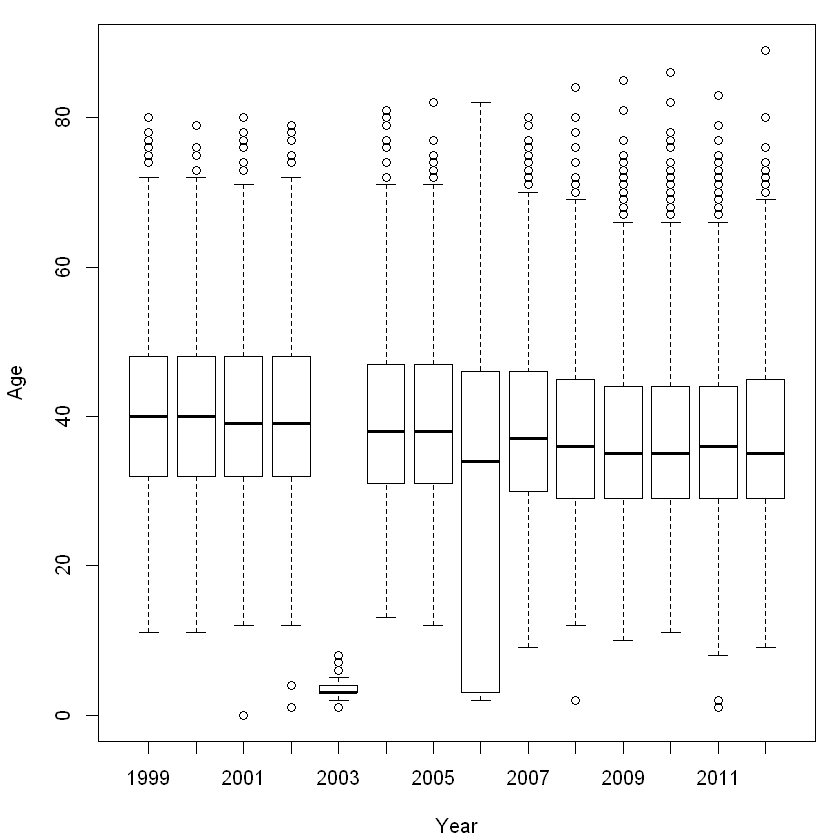

In [25]:
# pdf("CB_BoxplotAgeByYr.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

boxplot(age, ylab = "Age", xlab = "Year")

par(oldPar)
# dev.off()

In [26]:
head(menFiles[['2003']])

menFiles[['2006']][2200:2205]

[1] "\"\""                                                                                             
[2] "\"Place Div /Tot  Num    Name                          Ag Hometown            Gun Tim  Net Tim \""
[3] "\"===== ========= ===== ============================= == =================== =======  ======= \"" 
[4] "\"    1    1/1999     6  John Korir                    27  KEN                  46:56#   46:55 \""
[5] "\"    2    2/1999     1  Reuben Cheruiyot              28  KEN                  47:03#   47:02 \""
[6] "\"    3    3/1999     8  Gilbert Okari                 24  KEN                  47:07#   47:07 \""

[1] "\" 2192 1263/2892   1475 Matt Curtis            39 Vienna          1:27:08 1:27:40   8:46   \""
[2] "\" 2193  94/279    1437 Joe McCloskey          59 Columbia        1:27:01 1:27:40   8:46   \"" 
[3] "\" 2194 257/590    7062 Donald Hofmann         48 Princeton Junct 1:25:45 1:27:41   8:47   \"" 
[4] "\" 2195 1264/2892   7049 Claudio Petruzziello   23 Princeton Jct   1:25:45 1:27:41   8:47   \""
[5] "\" 2196 339/746    3319 Robert Morrison        40 South Boston    1:23:54 1:27:41   8:47   \"" 
[6] "\" 2197 1265/2892   9345 Larry Cooper           32 Arlington       1:26:42 1:27:41   8:47   \""

In [27]:
selectCols = function(shortColNames, headerRow, searchLocs) {
  sapply(shortColNames, function(shortName, headerRow, searchLocs){
    startPos = regexpr(shortName, headerRow)[[1]]
    if (startPos == -1) return( c(NA, NA) )
    index = sum(startPos >= searchLocs)
    c(searchLocs[index] + 1, searchLocs[index + 1])
  }, headerRow = headerRow, searchLocs = searchLocs )
}

In [28]:
menResMat = lapply(menFiles, extractVariables)
womenResMat = lapply(womenTables, extractVariables)

In [29]:
age = sapply(menResMat, 
             function(x) as.numeric(x[ , 'ag']))

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"

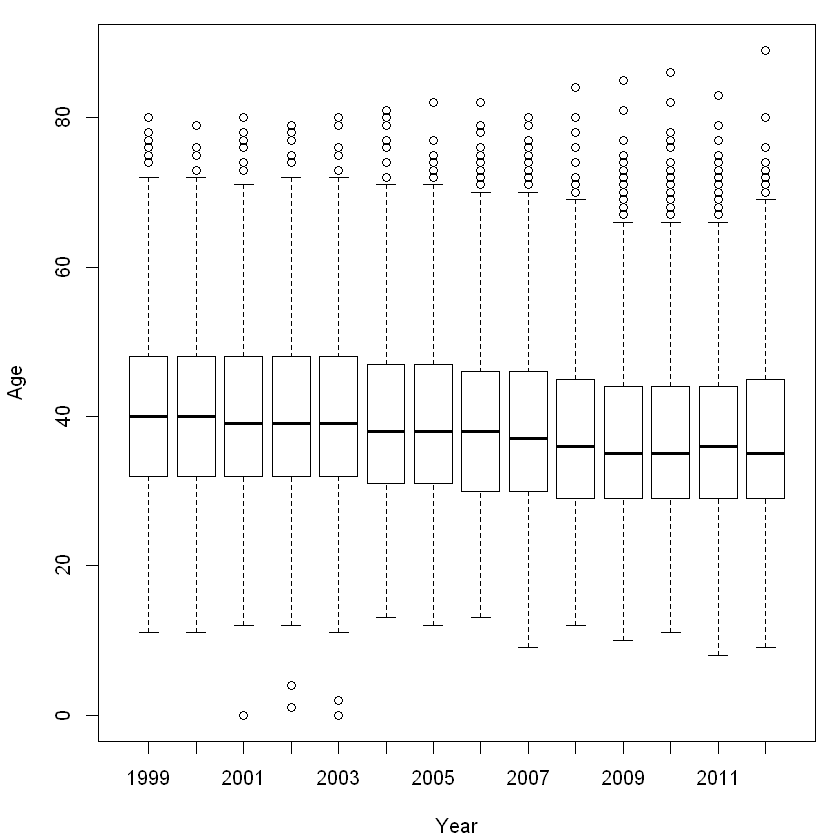

In [30]:
# pdf("CB_BoxplotAgeByYrRevised.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))
boxplot(age, ylab = "Age", xlab = "Year")
par(oldPar)
# dev.off()

In [31]:
sapply(age,  function(x) sum(is.na(x)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   1    1   61    3    2    0   13    2    5    0    2    6    0    1

In [32]:
age2001 = age[["2001"]]
grep("*===", menFiles[['2001']])

[1] 5

In [33]:
badAgeIndex = which(is.na(age2001)) + 5
menFiles[['2001']][ badAgeIndex ]

[1] "\"             \""                                                    
 [2] "\"                              \""                                   
 [3] "\"                      \""                                           
 [4] "\"\""                                                                 
 [5] "\"                         \""                                        
 [6] "\"\""                                                                 
 [7] "\"\""                                                                 
 [8] "\"\""                                                                 
 [9] "\"             \""                                                    
[10] "\"                              \""                                   
[11] "\"                      \""                                           
[12] "\"\""                                                                 
[13] "\"                         \""                                        
[14] "\"\""                                                                 
[15] "\"\""                                                                 
[16] "\"\""                                                                 
[17] "\"             \""                                                    
[18] "\"                              \""                                   
[19] "\"                      \""                                           
[20] "\"\""                                                                 
[21] "\"                         \""                                        
[22] "\"\""                                                                 
[23] "\"\""                                                                 
[24] "\"\""                                                                 
[25] "\"\""                                                                 
[26] "\"    \""                                                             
[27] "\"         \""                                                        
[28] "\"\""                                                                 
[29] "\"            \""                                                     
[30] "\"\""                                                                 
[31] "\"\""                                                                 
[32] "\"\""                                                                 
[33] "\"\""                                                                 
[34] "\"             \""                                                    
[35] "\"                              \""                                   
[36] "\"                      \""                                           
[37] "\"\""                                                                 
[38] "\"                         \""                                        
[39] "\"\""                                                                 
[40] "\"\""                                                                 
[41] "\"\""                                                                 
[42] "\"             \""                                                    
[43] "\"                              \""                                   
[44] "\"                      \""                                           
[45] "\"\""                                                                 
[46] "\"                         \""                                        
[47] "\"\""                                                                 
[48] "\"\""                                                                 
[49] "\"\""                                                                 
[50] "\"\""                                                                 
[51] "\"\""                                                                 
[52] "\"\""                                                               

In [34]:
badAgeIndex

[1] 1756 1757 1758 1759 1760 1761 1762 1763 1814 1815 1816 1817 1818 1819 1820
[16] 1821 1872 1873 1874 1875 1876 1877 1878 1879 1930 1931 1932 1933 1934 1935
[31] 1936 1937 2538 2539 2540 2541 2542 2543 2544 2545 2546 2897 2898 2899 2900
[46] 2901 2902 2903 2904 2955 2956 2957 3008 3009 3010 3011 3012 3013 3014 3015
[61] 3627

In [35]:
extractVariables = 
function(file, varNames =c("name", "home", "ag", "gun",
                           "net", "time"))
{
  
  # Find the index of the row with =s
  eqIndex = grep("*===", file)
  # Extract the two key rows and the data 
  spacerRow = file[eqIndex] 
  headerRow = tolower(file[ eqIndex - 1 ])
  body = file[ -(1 : eqIndex) ]
       # Remove footnotes and blank rows
  footnotes = grep("^[[:blank:]]*(\\*|\\#)", body)
  if ( length(footnotes) > 0 ) body = body[ -footnotes ]
  blanks = grep("^[[:blank:]]*$", body)
  if (length(blanks) > 0 ) body = body[ -blanks ]
  
  
  # Obtain the starting and ending positions of variables   
  searchLocs = findColLocs(spacerRow)
  locCols = selectCols(varNames, headerRow, searchLocs)
  
  Values = mapply(substr, list(body), start = locCols[1, ], 
                  stop = locCols[2, ])
  colnames(Values) = varNames
  
  return(Values)
}

In [36]:
menResMat = lapply(menFiles, extractVariables)
womenResMat = lapply(womenTables, extractVariables)

In [37]:
which(age2001 < 5)

[1] 1377 3063 3112

In [38]:
menFiles[['2001']][ which(age2001 < 5) + 5 ]

[1] "\" 1377  5629 Steve PINKOS           0 Washington DC      1:20:07 1:22:34\""
[2] "\" 3003  5033 Jeff LAKE              0 Clarksville MD     1:39:26 1:41:22\""
[3] "\" 3052  5637 Greg RHODE             0 Washington DC      1:37:14 1:42:13\""

In [39]:
#the book leaves it up to us what we do with this, for me I will remove these rows right now
#years 2001, 2002, and 2003 have ages under 5
for (yr in 2001:2003){
    yr = as.character(yr)
    menFiles[[yr]] = menFiles[[yr]][ -(which(age[[yr]] < 5) + grep("*===", menFiles[[yr]])) ]
}

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"

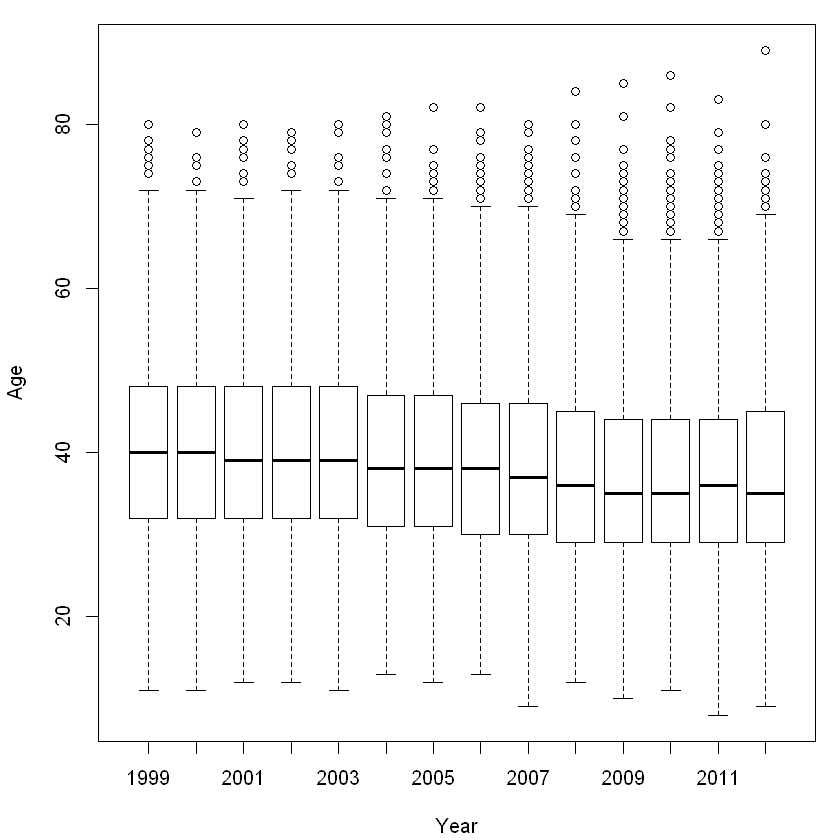

In [40]:
#now those lines aren't there, lets verify things look right by doing the box plot one more time
menResMat = lapply(menFiles, extractVariables)
womenResMat = lapply(womenTables, extractVariables)
age = sapply(menResMat, 
             function(x) as.numeric(x[ , 'ag']))
oldPar = par(mar = c(4.1, 4.1, 1, 1))
boxplot(age, ylab = "Age", xlab = "Year")
par(oldPar)

In [41]:
sapply(age,  function(x) sum(is.na(x)))
    #clearly the removal of blanks and footnotes didn't work

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   1    1   61    3    2    0   13    2    5    0    0    6    0    1

This is where page 60 starts

In [94]:
charTime = menResMat[['2012']][, 'time']
head(charTime, 5)

[1] "  45:15 " "  46:28 " "  47:33 " "  47:34 " "  47:40 "

In [95]:
tail(charTime, 5)

[1] "2:27:11 " "2:27:20 " "2:27:30 " "2:28:58 " "2:30:59 "

In [96]:
timePieces = strsplit(charTime, ":")

In [126]:
timePieces[[1]]

[1] "  45" "15 "

In [127]:
tail(timePieces, 1)

[[1]]
[1] "2"   "30"  "59 "

In [128]:
timePieces = sapply(timePieces, as.numeric)

runTime = sapply(timePieces, 
                 function(x) {
                   if (length(x) == 2) x[1] + x[2]/60
                   else 60*x[1] + x[2] + x[3]/60
                 })

summary(runTime)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.25   77.57   87.47   88.43   97.78  150.98 

In [129]:
convertTime = function(time) {
  timePieces = strsplit(time, ":")
  timePieces = sapply(timePieces, as.numeric)
  sapply(timePieces, function(x) {
                      if (length(x) == 2) x[1] + x[2]/60
                      else 60*x[1] + x[2] + x[3]/60
                      })
}

In [130]:
createDF = 
function(Res, year, sex) 
{
       # Determine which time to use
  useTime = if( !is.na(Res[1, 'net']) )  
              Res[ , 'net']
            else if( !is.na(Res[1, 'gun']) ) 
               Res[ , 'gun']
            else 
               Res[ , 'time']

  runTime = convertTime(useTime)
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'],
                       home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

In [131]:
menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X 

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

In [132]:
#in jupyter we get our warnings straightaway so this line returns NULL
warnings()[ c(1:2, 49:50) ]

NULL

In [133]:
sapply(menDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    1   63    1    2    0    3 5234   85    0   72   70    0    0

In [134]:
createDF = function(Res, year, sex) 
{
  # Determine which time to use
  if ( !is.na(Res[1, 'net']) ) useTime = Res[ , 'net']
  else if ( !is.na(Res[1, 'gun']) ) useTime = Res[ , 'gun']
  else useTime = Res[ , 'time']
  
  # Remove # and * and blanks from time
  useTime = gsub("[#\\*[:blank:]]", "", useTime)
  runTime = convertTime(useTime[ useTime != "" ])
  
  # Drop rows with no time
  Res = Res[ useTime != "", ]
  
  Results = data.frame(year = rep(year, nrow(Res)),
                       sex = rep(sex, nrow(Res)),
                       name = Res[ , 'name'], home = Res[ , 'home'],
                       age = as.numeric(Res[, 'ag']), 
                       runTime = runTime,
                       stringsAsFactors = FALSE)
  invisible(Results)
}

In [136]:
menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced 

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

In [137]:
sapply(menDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    3    1    0    0    0 5232    0    0    0    0    0    0

In [162]:
men01 = menDF[["2001"]]
men01[is.na(men01$runTime),]

,year,sex,name,home,age,runTime
2249,2001,M,Peter HUI,Silver Spring MD,70,NA
2749,2001,M,Mario GABALDA,Arlington VA,27,NA
3559,2001,M,F OPEN guideline *,er USATF Age-Group,NA,NA


In [181]:
#exploring why 2001 and 2002 had some messed up times still (this wasn't found in the book)
men01 = menResMat[["2001"]]
inds = c(grep("Peter HUI", men01[,"name"]), grep("GABALDA", men01[,"name"]), grep("F OPEN guideline", men01[,"name"]))
men01[inds,]

name,home,ag,gun,net,time
Peter HUI,Silver Spring MD,70,,"1:30:""",NA
Mario GABALDA,Arlington VA,27,,"1:29:42""",NA
F OPEN guideline *,er USATF Age-Group,Und,"e""",guidelin,NA


In [185]:
#okay, our solution will be to correct HUI and GABALDA's times then drop the F OPEN lines
men02 = menDF[["2002"]]
men02[is.na(men02$runTime),]

,year,sex,name,home,age,runTime
3722,2002,M,TF OPEN guideline *,der USATF Age-Group,NA,NA


In [206]:
#we just remove that last line
menResMat[["2002"]] <- menResMat[["2002"]][-(grep("TF OPEN", men02[,"name"])),]

In [194]:
menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduce

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN

In [195]:
#okay, now we look like the book at this same point
sapply(menDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0 5232    0    0    0    0    0    0

In [196]:
separatorIdx = grep("*===", menFiles[["2006"]])
separatorRow = menFiles[['2006']][separatorIdx]
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                      substring(separatorRow, 65, nchar(separatorRow)), 
                      sep = "")
menFiles[['2006']][separatorIdx] = separatorRowX

In [212]:
#compute menResMat then do my solution to the RunTimes for HUI and GABALDA
menResMat = sapply(menFiles, extractVariables)

#let's remove the last row, and change the other two appropriately
menResMat[["2001"]][inds[1],"net"] <- '1:30:00'
menResMat[["2001"]][inds[2],"net"] <- '1:29:42'
menResMat[["2001"]] <- menResMat[["2001"]][-inds[3],]
#we just remove that last line
menResMat[["2002"]] <- menResMat[["2002"]][-(grep("TF OPEN", men02[,"name"])),]
menResMat[["2001"]][inds[1:2],]

name,home,ag,gun,net,time
Peter HUI,Silver Spring MD,70,,1:30:00,NA
Mario GABALDA,Arlington VA,27,,1:29:42,NA


In [213]:
menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduce

In [214]:
#okay, now we look like the book at this same point
sapply(menDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0   14    0    0    0    0    0    0

In [216]:
menDF[["2006"]][is.na(menDF[["2006"]]$runTime),]

,year,sex,name,home,age,runTime
2038,2006,M,Brian Ingerick,Middlebury Cen,34,NA
2131,2006,M,Robert Mansker,Fairfax Statio,33,NA
2228,2006,M,Ryan Tomer,Fort Washingto,32,NA
2315,2006,M,Steve Dunleavey,Fairfax Statio,33,NA
2402,2006,M,Chris Stone,Montgomery Vil,36,NA
2616,2006,M,Russell Cotner,Charlottesvill,27,NA
2949,2006,M,Scott Bender,Charlottesvill,37,NA
3919,2006,M,Michael Dyer,Montgomery Vil,30,NA
3941,2006,M,Todd Wickersty,Charlottesvill,35,NA
4003,2006,M,Adam Kurjanowicz,Fairfax Statio,25,NA


In [217]:
#exploring why 2001 and 2002 had some messed up times still (this wasn't found in the book)
men06 = menResMat[["2006"]]
inds = c(grep("Brian Ingerick", men06[,"name"]), grep("Robert Mansker", men06[,"name"]), 
         grep("Ryan Tomer", men06[,"name"]), grep("Steve Dunleavey", men06[,"name"]), 
         grep("Chris Stone", men06[,"name"]), grep("Russell Cotner", men06[,"name"]), 
         grep("Scott Bender", men06[,"name"]), grep("Michael Dyer", men06[,"name"]), 
         grep("Todd Wickersty", men06[,"name"]), grep("Adam Kurjanowicz", men06[,"name"]), 
         grep("Brian Clapp", men06[,"name"]), grep("James Vidas", men06[,"name"]), 
         grep("Robert Betts", men06[,"name"]), grep("Jeffery P Foltz", men06[,"name"]))
men06[inds,]
#looks like the lst letter of home showed up in their net, lets fix both home and net

name,home,ag,gun,net,time
Brian Ingerick,Middlebury Cen,34,1:26:19,t 1:19:15,NA
Robert Mansker,Fairfax Statio,33,1:27:05,n 1:26:08,NA
Ryan Tomer,Fort Washingto,32,1:27:54,n 1:23:09,NA
Steve Dunleavey,Fairfax Statio,33,1:28:30,n 1:24:34,NA
Chris Stone,Montgomery Vil,36,1:29:12,l 1:26:11,NA
Russell Cotner,Charlottesvill,27,1:31:03,e 1:24:56,NA
Scott Bender,Charlottesvill,37,1:33:52,e 1:28:05,NA
Michael Dyer,Montgomery Vil,30,1:43:03,l 1:33:27,NA
Todd Wickersty,Charlottesvill,35,1:43:14,e 1:36:20,NA
Adam Kurjanowicz,Fairfax Statio,25,1:43:58,n 1:36:46,NA


In [218]:
menResMat[["2006"]][inds[1], "home"] = "Middlebury Cent"
menResMat[["2006"]][inds[1], "net"] = "1:19:15"
menResMat[["2006"]][inds[2], "home"] = "Fairfax Station"
menResMat[["2006"]][inds[2], "net"] = "1:26:08"
menResMat[["2006"]][inds[3], "home"] = "Fort Washington"
menResMat[["2006"]][inds[3], "net"] = "1:23:09"
menResMat[["2006"]][inds[4], "home"] = "Fairfax Station"
menResMat[["2006"]][inds[4], "net"] = "1:24:34"
menResMat[["2006"]][inds[5], "home"] = "Montgomery Vill"
menResMat[["2006"]][inds[5], "net"] = "1:26:11"
menResMat[["2006"]][inds[6], "home"] = "Charlottesville"
menResMat[["2006"]][inds[6], "net"] = "1:24:56"
menResMat[["2006"]][inds[7], "home"] = "Charlottesville"
menResMat[["2006"]][inds[7], "net"] = "1:28:05"
menResMat[["2006"]][inds[8], "home"] = "Montgomery Vill"
menResMat[["2006"]][inds[8], "net"] = "1:33:27"
menResMat[["2006"]][inds[9], "home"] = "Charlottesville"
menResMat[["2006"]][inds[9], "net"] = "1:36:20"
menResMat[["2006"]][inds[10], "home"] = "Fairfax Station"
menResMat[["2006"]][inds[10], "net"] = "1:36:46"
menResMat[["2006"]][inds[11], "home"] = "Chesapeake Beac"
menResMat[["2006"]][inds[11], "net"] = "1:39:29"
menResMat[["2006"]][inds[12], "home"] = "Montgomery Vill"
menResMat[["2006"]][inds[12], "net"] = "1:36:21"
menResMat[["2006"]][inds[13], "home"] = "Charolettesville"
menResMat[["2006"]][inds[13], "net"] = "1:53:49"
menResMat[["2006"]][inds[14], "home"] = "Chesapeake Beac"
menResMat[["2006"]][inds[14], "net"] = "1:58:34"

In [219]:
menDF = mapply(createDF, menResMat, year = 1999:2012,
               sex = rep("M", 14), SIMPLIFY = FALSE)

In [220]:
#whew! this is the worst exercise to go through!
sapply(menDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0

In [222]:
separatorIdx = grep("*===", womenTables[["2006"]])
separatorRow = womenTables[['2006']][separatorIdx]
separatorRowX = paste(substring(separatorRow, 1, 63), " ", 
                     substring(separatorRow, 65, nchar(separatorRow)), 
                     sep = "")
womenTables[['2006']][separatorIdx] = separatorRowX

In [223]:
womenResMat = sapply(womenTables, extractVariables)
womenDF = mapply(createDF, womenResMat, year = 1999:2012,
              sex = rep("W", 14), SIMPLIFY = FALSE)

Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced 

In [224]:
#whew! this is the worst exercise to go through!
sapply(womenDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    1    1    0    0    0   28    0    0    0    0    0    0

In [231]:
#ugh, we have to do it again for women now
womenDF[["2001"]][is.na(womenDF[["2001"]]["runTime"]),]

,year,sex,name,home,age,runTime
2973,2001,W,F OPEN guideline *,er USATF Age-Group,NA,NA


In [232]:
womenDF[["2002"]][is.na(womenDF[["2002"]]["runTime"]),]

,year,sex,name,home,age,runTime
3335,2002,W,TF OPEN guideline *,der USATF Age-Group,NA,NA


In [234]:
womenDF[["2006"]][is.na(womenDF[["2006"]]["runTime"]),"name"]

[1] " Tania Danielson       " " Catherine Bender      "
 [3] " Kelly McClurkin       " " Stefanie Hutchins     "
 [5] " Lelia Hicks           " " Karen Akerlof         "
 [7] " Nancy Kramek          " " Heather Igel          "
 [9] " Sandra Guinan         " " Marilise Hyacinth     "
[11] " Jackie Kane           " " Stina Augustsson      "
[13] " Kristin Cseh          " " Larissa Newman        "
[15] " Kate Talbert          " " Natalie Shonka        "
[17] " Erica Kane            " " Catherine Jennings    "
[19] " Courtenay Harms       " " Carol Taylor          "
[21] " Kortney Wallace       " " Doris Ryba            "
[23] " Erika Stottuth        " " Katherine Black       "
[25] " Ami Settle            " " Beth Kilbourne        "
[27] " Sarah Kilbourne       " " Celine Parker         "

In [237]:
#here is the way to do this, rather than typing those names into a bunch of grps we can just extract the names
#into a vector then use lapply with grep and the place we want to look them up in
wnms = as.vector(womenDF[["2006"]][is.na(womenDF[["2006"]]["runTime"]),"name"])
inds = unlist(lapply(wnms, FUN=function(x) grep(x, womenResMat[["2006"]][,"name"]))) #also need to unlist

In [274]:
#we suspect the home and net is the problem again
womenResMat[["2006"]][inds,c("home", "net")]

home,net
Port Washingto,n 1:32:13
Charlottesvill,e 1:28:04
Hoffman Estate,s 1:30:37
University Par,k 1:31:51
District Heigh,t 1:36:13
Fairfax Statio,n 1:38:47
West Conshohoc,k 1:34:51
Charlottesvill,e 1:33:24
Montgomery Vil,l 1:38:39
Charlottesvill,e 1:35:47


In [275]:
#okay, instead of manually doing this like i did for the men we will use the functionality of r
womenResMat[["2006"]][inds, "home"] = paste(womenResMat[["2006"]][inds, "home"], 
                                            substr(womenResMat[["2006"]][inds, "net"], 1, 2),sep="")
womenResMat[["2006"]][inds,"net"] = substr(womenResMat[["2006"]][inds,"net"],3, 10)
#now check the results
womenResMat[["2006"]][inds,c("home", "net")]

home,net
Port Washington,1:32:13
Charlottesville,1:28:04
Hoffman Estates,1:30:37
University Park,1:31:51
District Height,1:36:13
Fairfax Station,1:38:47
West Conshohock,1:34:51
Charlottesville,1:33:24
Montgomery Vill,1:38:39
Charlottesville,1:35:47


In [276]:
#...and just remove the messed up rows for 2001 and 2002
womenResMat[["2001"]] <- womenResMat[["2001"]][-(grep("F OPEN", womenResMat[["2001"]][,"name"])),]
womenResMat[["2002"]] <- womenResMat[["2002"]][-(grep("F OPEN", womenResMat[["2002"]][,"name"])),]

In [277]:
womenDF = mapply(createDF, womenResMat, year = 1999:2012,
              sex = rep("W", 14), SIMPLIFY = FALSE)

Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"

In [278]:
sapply(womenDF, function(x) sum(is.na(x$runTime)))

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0

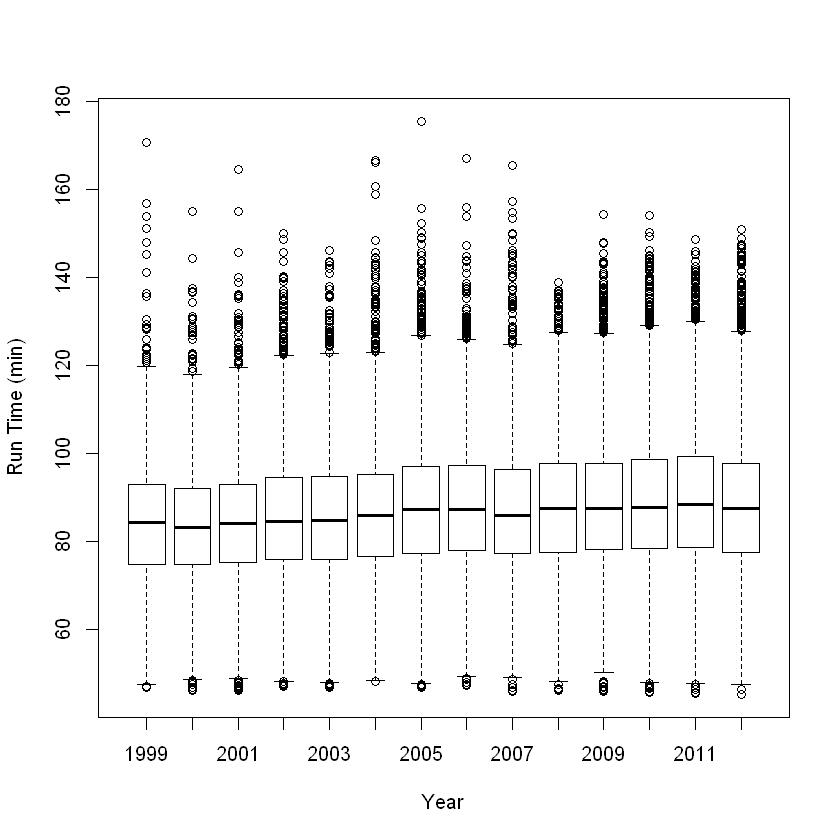

In [279]:
# pdf("CB_BoxplotTimeByYr.pdf", width = 8, height = 5)
boxplot(sapply(menDF, function(x) x$runTime), 
        xlab = "Year", ylab = "Run Time (min)")
# dev.off()

In [280]:
cbMen = do.call(rbind, menDF)
save(cbMen, file = "cbMen.rda")

dim(cbMen) #book shows 70070 but we removed some people with age less than 5

[1] 70063     6

In [281]:
#we kept track of the women data this whole time so let's also export that
cbWomen = do.call(rbind, womenDF)
save(cbWomen, file = "cbWomen.rda")

dim(cbWomen)

[1] 75972     6